In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine 
import seaborn as sns

### Конфигурация для подключения к базе данных `data-analyst-advanced-sql`
Эта база данных содержит схему `stackoverflow`, с которой вы будете работать в проекте

In [2]:
db_config = {
    'user': 'praktikum_student', # имя пользователя
    'pwd': 'Sdf4$2;d-d30pp', # пароль
    'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
    'port': 6432, # порт подключения
    'db': 'data-analyst-advanced-sql' # название базы данных
}  

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db'],
)

Создание подключения

In [3]:
engine = create_engine(connection_string) 

Пример запроса к базе данных

`sample_df` является pandas-датафреймом.

In [4]:
query = '''
SELECT *
FROM stackoverflow.users
LIMIT 10;
'''

sample_df = pd.read_sql_query(query, con=engine) 

In [5]:
sample_df

,id,creation_date,display_name,last_access_date,location,reputation,views
0,1,2008-07-31 14:22:31,Jeff Atwood,2018-08-29 02:34:23,"El Cerrito, CA",44300,408587
1,2,2008-07-31 14:22:31,Geoff Dalgas,2018-08-23 17:31:56,"Corvallis, OR",3491,23966
2,3,2008-07-31 14:22:31,Jarrod Dixon,2018-08-30 20:56:24,"Raleigh, NC, United States",13418,24396
3,4,2008-07-31 14:22:31,Joel Spolsky,2018-08-14 22:18:15,"New York, NY",28768,73755
4,5,2008-07-31 14:22:31,Jon Galloway,2018-08-29 16:48:36,"San Diego, CA",39172,11700
5,8,2008-07-31 21:33:24,Eggs McLaren,2018-04-09 02:04:56,None,942,6372
6,9,2008-07-31 21:35:27,Kevin Dente,2018-08-30 18:18:03,"Oakland, CA",14337,4949
7,11,2008-08-01 00:59:11,Anonymous User,2008-08-01 00:59:11,None,1890,2123
8,13,2008-08-01 04:18:05,Chris Jester-Young,2018-08-30 02:47:23,"Raleigh, NC, United States",177138,35414
9,17,2008-08-01 12:02:22,Nick Berardi,2018-01-22 01:35:38,"Issaquah, WA",44443,4786


# Задание 1

Выведите общую сумму просмотров постов за каждый месяц 2008 года. Если данных за какой-либо месяц в базе нет, такой месяц можно пропустить. Результат отсортируйте по убыванию общего количества просмотров.

| month_date  | total_views |
| ------------- | ------------- |
| 2008-09-01  | 452928568  |
| 2008-10-01  | 365400138  |
| ...         | ... |

In [6]:
# напишите запрос
query = '''
SELECT DATE_TRUNC ('month', creation_date):: date AS month_post,
       SUM(views_count) AS sum_views 
FROM stackoverflow.posts
GROUP BY month_post
ORDER BY sum_views DESC;
'''

qw = pd.read_sql_query(query, con = engine)# выполните запрос
qw# выполните запрос

,month_post,sum_views
0,2008-09-01,452928568
1,2008-10-01,365400138
2,2008-11-01,221759651
3,2008-12-01,197792841
4,2008-08-01,131367083
5,2008-07-01,669895


Проанализируйте итоговую таблицу. Отличаются ли данные за разные месяцы? С чем могут быть связаны отличия?

У Нас нет данных с 1 по 6 месяц,  на 9 месяц был пик просмотров, после которого с 9 по 12 начал плавно уменьшался, возможно данный пик связан с началом учебного года в школах/вузах и тд. , при этом в 7 и 8 месяце самый минимальный просмотр постов, возможно связан с летним периодом когда у всех каникулы/отпуска и тд и людям не до просмотра постов

# Задание 2

Выведите имена самых активных пользователей, которые в первый месяц после регистрации (включая день регистрации) дали больше 100 ответов. Вопросы, которые задавали пользователи, не учитывайте. Для каждого имени пользователя выведите количество уникальных значений `user_id`. Отсортируйте результат по полю с именами в лексикографическом порядке.

| display_name | count |
| ------------ | ----- |
| 1800 INFORMATION | 1 |
| Adam Bellaire | 1 |
| Adam Davis | 1 |
| ... | ... |

In [7]:
# напишите запрос
query = '''
SELECT u.display_name,
       COUNT(DISTINCT p.user_id)
FROM stackoverflow.users AS u
JOIN stackoverflow.posts AS p ON u.id= p.user_id
JOIN stackoverflow.post_types AS pt ON p.post_type_id=pt.id
WHERE pt.type = 'Answer' AND p.creation_date::date BETWEEN u.creation_date::date AND (u.creation_date::date + INTERVAL '1 month')
GROUP BY 1
HAVING COUNT(pt.id) > 100
ORDER BY u.display_name;
'''

qe = pd.read_sql_query(query, con = engine)# выполните запрос
qe# выполните запрос

,display_name,count
0,1800 INFORMATION,1
1,Adam Bellaire,1
2,Adam Davis,1
3,Adam Liss,1
4,Alan,8
...,...,...
74,lomaxx,1
75,mattlant,1
76,paxdiablo,1
77,tvanfosson,1


Какие аномалии наблюдаются в данных? О чём они говорят?

у некоторых пользователей количество уникальных значений индификатора пользователя больше 1, возможно это связано с их именами,а именно при сокращении имен, эти имена приходятся на эти сокращения. взять Chris на которое приходится 29 уникальных значений, это может от полного Кристин, Кристиан, Криста и тому подобное

# Задание 3

Выведите количество постов за 2008 год по месяцам. Отберите посты от пользователей, которые зарегистрировались в сентябре 2008 года и сделали хотя бы один пост в декабре того же года. Отсортируйте таблицу по значению месяца по убыванию.

| month | count |
| ------|------ |
| 2008-12-01 | 17641 |
| 2008-11-01 | 18294 |
| ... | ... |

In [8]:
# напишите запрос
query = '''
WITH tr AS (SELECT u.id
               FROM stackoverflow.posts AS p
               JOIN stackoverflow.users AS u ON p.user_id=u.id
               WHERE DATE_TRUNC('month', u.creation_date)::date = '2008-09-01' 
                   AND DATE_TRUNC('month', p.creation_date)::date = '2008-12-01'
               GROUP BY 1
               HAVING COUNT(p.id) > 0)

SELECT DATE_TRUNC('month', p.creation_date)::date,
       COUNT(p.id)
FROM stackoverflow.posts AS p
WHERE p.user_id IN (SELECT *
                    FROM tr)
GROUP BY 1
ORDER BY 1 DESC;
'''

qr = pd.read_sql_query(query, con = engine)# выполните запрос
qr# выполните запрос

,date_trunc,count
0,2008-12-01,17641
1,2008-11-01,18294
2,2008-10-01,27171
3,2008-09-01,24870
4,2008-08-01,32


Изучите данные: есть ли в них аномалии? Предположите, почему могли появиться аномальные значения.

в августе показывает 32 поста, хотя как это может показывать если пользователь зарегистрировался только в сентябре, возможно это какая то ошибка системы, которая позволяла делать посты без регистрации и как вариант из за разницы часовых поясов еще мб

# Задание 4

Используя данные о постах, выведите несколько полей:

- идентификатор пользователя, который написал пост;
- дата создания поста;
- количество просмотров у текущего поста;
- сумму просмотров постов автора с накоплением.

Данные в таблице должны быть отсортированы по возрастанию идентификаторов пользователей, а данные об одном и том же пользователе — по возрастанию даты создания поста.

| user_id | creation_date | views_count | cumulative_count |
| ------ | -------------- | ----------- | ---------------- |
| 1 | 2008-07-31 23:41:00  | 480476   | 480476  |
| 1 | 2008-07-31 23:55:38  | 136033 | 616509  | 
| 1 | 2008-07-31 23:56:41  | 0 |  616509  |
| ... | ... | ... | ... |
| 2 | 2008-07-31 23:56:41 | 79087  | 79087 |
| 2 | 2008-08-01 05:09:56 | 65443 | 144530 |
| ... | ...  | ...  | ...  |

In [9]:
# напишите запрос
query = '''
SELECT user_id,
       creation_date,
       views_count,
       SUM(views_count) OVER (PARTITION BY user_id ORDER BY creation_date)
FROM stackoverflow.posts;
'''

qt = pd.read_sql_query(query, con = engine)# выполните запрос
qt# выполните запрос

,user_id,creation_date,views_count,sum
0,1,2008-07-31 23:41:00,480476,480476
1,1,2008-07-31 23:55:38,136033,616509
2,1,2008-07-31 23:56:41,0,616509
3,1,2008-08-04 02:45:08,0,616509
4,1,2008-08-04 04:31:03,0,616509
...,...,...,...,...
243791,5696608,2008-12-23 16:00:37,0,2804
243792,5696608,2008-12-23 17:35:09,0,2804
243793,5696608,2008-12-24 01:02:48,0,2804
243794,5696608,2008-12-30 14:34:45,0,2804


# Задание 5

Найдите среднее количество постов пользователей в день за август 2008 года. Отберите данные о пользователях, которые опубликовали больше 120 постов за август. Дни без публикаций не учитывайте. 

Отсортируйте результат по возрастанию среднего количества постов. Значения можно не округлять.

| user_id | avg_daily |
| ------- | --------- |
| 116     | 4.777778  |
| 234     | 5.208333  |
| ...     | ... |

In [10]:
# напишите запрос
query = '''
WITH tr AS (
      SELECT user_id,
             DATE_TRUNC('day', creation_date),
             COUNT(DATE_TRUNC('day', creation_date)) AS count_day
      FROM stackoverflow.posts
       WHERE DATE_TRUNC('day', creation_date) BETWEEN '2008-08-01' AND '2008-08-31' 
       AND  user_id IN (
            SELECT user_id
            FROM stackoverflow.posts
            WHERE DATE_TRUNC('day', creation_date) BETWEEN '2008-08-01' AND '2008-08-31'
            GROUP BY 1
            HAVING COUNT(user_id)> 120)
        GROUP BY 1,2)
SELECT user_id,
       AVG(count_day)
FROM tr
GROUP BY 1
ORDER BY 2;
'''

qw = pd.read_sql_query(query, con = engine)# выполните запрос
qw# выполните запрос

,user_id,avg
0,116,4.777778
1,234,5.208333
2,91,5.681818
3,905,7.000000
4,383,7.277778


# Задание 6

Сколько в среднем дней в период с 1 по 7 декабря 2008 года пользователи взаимодействовали с платформой? Для каждого пользователя отберите дни, в которые он или она опубликовали хотя бы один пост. Нужно получить одно целое число — не забудьте округлить результат. 

| result |
| -----  |
| <целое число> |

In [11]:
# напишите запрос
query = '''
WITH ad AS (SELECT user_id,
                   COUNT(DISTINCT creation_date::date)  AS cnt
            FROM stackoverflow.posts
            WHERE creation_date::date BETWEEN '2008-12-01' AND '2008-12-07' 
            GROUP BY 1)

SELECT ROUND(AVG(ad.cnt))
FROM ad;
'''

qw = pd.read_sql_query(query, con = engine)# выполните запрос
qw
# выполните запрос

,round
0,2.0


Проанализируйте итоговую таблицу — какие выводы можно сделать?

Почти целых 2 дня пользователи взаимодейсвовали с платформой в вышеуказанные дни # напишите ваш ответ здесь

# Задание 7

Выведите историю активности каждого пользователя в таком виде: идентификатор пользователя, дата публикации поста. Отсортируйте вывод по возрастанию идентификаторов пользователей, а для каждого пользователя — по возрастанию даты публикации.

Добавьте в таблицу новое поле: для каждого поста в нём будет указано название месяца предпоследней публикации пользователя относительно текущей. Если такой публикации нет, укажите `NULL`.  Python автоматически поменяет `NULL` на `None`, но дополнительно преобразовывать значения `None` вам не нужно.

Посмотрите внимательно на образец таблицы: для первых двух постов предпоследней публикации нет, но, начиная с третьего поста, в новое поле входит нужный месяц. Для следующего пользователя в первые две записи поля `second_last_month` тоже войдёт `NULL`.

| user_id | creation_date | second_last_month |
| ------- | ------------- | ----------------- |
| 1       | 2008-07-31 23:41:00 | None |
| 1       | 2008-07-31 23:55:38 | None |
| 1       | 2008-07-31 23:56:41 | July |
| 1       | 2008-08-04 02:45:08 | July |
| 1       | 2008-08-04 04:31:03 | July |
| 1       | 2008-08-04 08:04:42 | August |
| ... | ... | ... |

In [12]:
# напишите запрос
query = '''
SELECT user_id,
       creation_date,
       to_char(LEAD(creation_date,2,NULL) OVER(PARTITION BY user_id ORDER BY creation_date DESC), 'Month') AS second_last_month
FROM stackoverflow.posts
ORDER BY 1,2;
'''

qw = pd.read_sql_query(query, con = engine)# выполните запрос
qw# выполните запрос

,user_id,creation_date,second_last_month
0,1,2008-07-31 23:41:00,None
1,1,2008-07-31 23:55:38,None
2,1,2008-07-31 23:56:41,July
3,1,2008-08-04 02:45:08,July
4,1,2008-08-04 04:31:03,July
...,...,...,...
243791,5696608,2008-12-23 16:00:37,December
243792,5696608,2008-12-23 17:35:09,December
243793,5696608,2008-12-24 01:02:48,December
243794,5696608,2008-12-30 14:34:45,December


# Задание 8

Рассчитайте аналог Retention Rate по месяцам для пользователей StackOverflow. Объедините пользователей в когорты по месяцу их первого поста. Возвращение определяйте по наличию поста в текущем месяце. 

| cohort_dt | session_date | users_cnt | cohort_users_cnt | retention_rate |
| --- | --- | --- | --- | --- |
| 2008-07-01 00:00:00 | 2008-07-01 00:00:00 | 3 | 3 | 100 |
| 2008-07-01 00:00:00 | 2008-08-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-07-01 00:00:00 | 2008-09-01 00:00:00 | 1 | 3 | 33,33 |
| 2008-07-01 00:00:00 | 2008-10-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-07-01 00:00:00 | 2008-11-01 00:00:00 | 1 | 3 | 33,33 |
| 2008-07-01 00:00:00 | 2008-12-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-08-01 00:00:00 | 2008-08-01 00:00:00 | 2151 | 2151 | 100 |
| ... | ... | ... | ... | ... |

In [13]:
# напишите запрос
query = '''
WITH profile AS
  (SELECT user_id,
          MIN(DATE_TRUNC ('month', creation_date)) as dt,
          COUNT(*) OVER (PARTITION BY MIN(DATE_TRUNC ('month', creation_date))) AS cohort_users_cnt
   FROM stackoverflow.posts
   GROUP BY 1
   ORDER BY 2),
sessions AS 
(SELECT user_id,
        DATE_TRUNC ('month', creation_date) AS session_date
FROM stackoverflow.posts
GROUP BY 1,
         2)
SELECT p.dt AS cohort_dt,
       session_date,
       COUNT(p.user_id) AS users_cnt,
       cohort_users_cnt,
       ROUND(COUNT(p.user_id) * 100.0 / cohort_users_cnt, 2) AS retention_rate
FROM profile p
JOIN sessions s ON p.user_id = s.user_id
GROUP BY 1,
         2,
         4
'''

tr = pd.read_sql_query(query, con = engine)# выполните запрос
tr

,cohort_dt,session_date,users_cnt,cohort_users_cnt,retention_rate
0,2008-07-01,2008-07-01,3,3,100.00
1,2008-07-01,2008-08-01,2,3,66.67
2,2008-07-01,2008-09-01,1,3,33.33
3,2008-07-01,2008-10-01,2,3,66.67
4,2008-07-01,2008-11-01,1,3,33.33
5,2008-07-01,2008-12-01,2,3,66.67
6,2008-08-01,2008-08-01,2151,2151,100.00
7,2008-08-01,2008-09-01,1571,2151,73.04
8,2008-08-01,2008-10-01,1275,2151,59.27
9,2008-08-01,2008-11-01,1050,2151,48.81


Постройте тепловую карту Retention Rate. Какие аномалии или другие необычные явления удалось выявить? Сформулируйте гипотезы о возможных причинах.

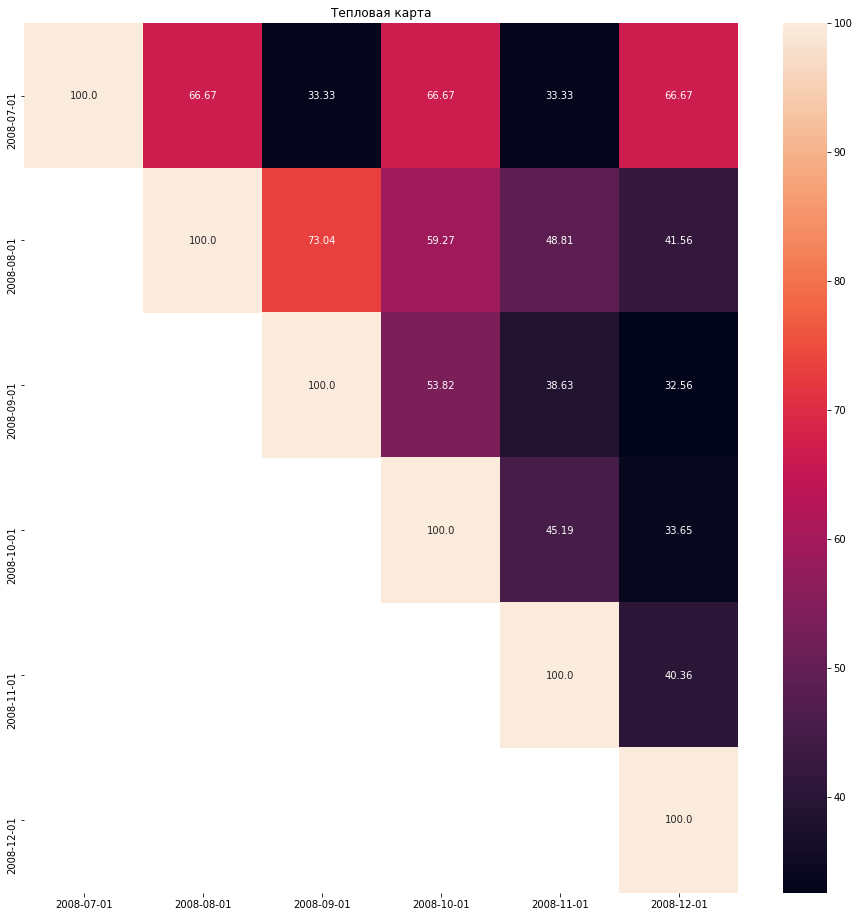

In [14]:
retention = tr.pivot('cohort_dt', 'session_date', 'retention_rate')
retention.index = [str(x)[0:10] for x in retention.index]
retention.columns = [str(x)[0:10] for x in retention.columns]

# строим хитмэп
plt.figure(figsize=(16, 16)) # задаём размер графика
sns.heatmap(retention, # датафрейм с данными
            annot=True, # добавляем подписи
            fmt='') # задаём исходный формат
plt.title('Тепловая карта') # название графика
plt.show() # постройте тепловую карту Retention Rate

В кагорте, которая начинается в июле, начиная с 4-ого месяца наблюдается аномалия, так как как когрта всего из 3 человек вот они скачут с распределениями 66 и 33 %

# Задание 9


На сколько процентов менялось количество постов ежемесячно с 1 сентября по 31 декабря 2008 года? Отобразите таблицу со следующими полями:

- номер месяца;
- количество постов за месяц;
- процент, который показывает, насколько изменилось количество постов в текущем месяце по сравнению с предыдущим.

Если постов стало меньше, значение процента должно быть отрицательным, если больше — положительным. Округлите значение процента до двух знаков после запятой.

Напомним, что при делении одного целого числа на другое в PostgreSQL в результате получится целое число, округлённое до ближайшего целого вниз. Чтобы этого избежать, переведите делимое в тип `numeric`.

| creation_month | posts_count | percentage |
| -------------- | ----------- | ---------- |
| 9 | 70731 | Nan |
| 10 | 63102 | -10.33 |
| ... | ... | ... |

In [15]:
# напишите запрос
query = '''
WITH rt AS (SELECT EXTRACT(MONTH from creation_date::date) AS creation_month,
                    COUNT(DISTINCT id) AS posts_count	
                    FROM stackoverflow.posts
                    WHERE creation_date::date BETWEEN '2008-09-01' AND '2008-12-31'
                    GROUP BY 1)

SELECT *,
       ROUND(((posts_count	::numeric / LAG(posts_count	) OVER (ORDER BY creation_month)) - 1) * 100, 2) AS percentage
FROM rt;
'''
df = pd.read_sql_query(query, con = engine)# выполните запрос

Постройте круговую диаграмму с количеством постов по месяцам.

In [16]:
print(df.head()) 

   creation_month  posts_count  percentage
0             9.0        70371         NaN
1            10.0        63102      -10.33
2            11.0        46975      -25.56
3            12.0        44592       -5.07


<AxesSubplot:title={'center':'Количество постов по месяцам'}, ylabel='posts_count'>

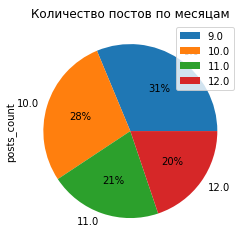

In [17]:
df.groupby(['creation_month']). sum ().plot(kind='pie', y='posts_count', autopct='%1.0f%%', title='Количество постов по месяцам')

# Задание 10

Выгрузите данные активности пользователя, который опубликовал больше всего постов за всё время. Выведите данные за октябрь 2008 года в таком виде:

- номер недели;
- дата и время последнего поста, опубликованного на этой неделе.

| week_creation | creation_date |
| ------------- | ------------- |
| 40 | 2008-10-05 09:00:58 |
| 41 | 2008-10-12 21:22:23 |
| ... | ... |

In [18]:
# напишите запрос
query = '''
WITH user_post AS (SELECT user_id,
                   COUNT(DISTINCT id) AS cnt
                   FROM stackoverflow.posts
                   GROUP BY 1
                   ORDER BY 2 DESC
                   LIMIT 1),
     rt AS (SELECT p.user_id,
             p.creation_date,
             extract('week' from p.creation_date) AS week_creation
             FROM stackoverflow.posts AS p
             JOIN user_post ON user_post.user_id = p.user_id
             WHERE DATE_TRUNC('month', p.creation_date)::date = '2008-10-01')
SELECT DISTINCT week_creation::numeric,
       MAX(creation_date) OVER (PARTITION BY week_creation) AS creation_date
FROM rt
ORDER BY 1;
'''

qw = pd.read_sql_query(query, con = engine)# выполните запрос
qw# выполните запрос

,week_creation,creation_date
0,40.0,2008-10-05 09:00:58
1,41.0,2008-10-12 21:22:23
2,42.0,2008-10-19 06:49:30
3,43.0,2008-10-26 21:44:36
4,44.0,2008-10-31 22:16:01
